In [4]:
import pandas as pd

In [5]:
bike_data = pd.read_csv("train.csv")
bike_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
bike_data.shape

(10886, 12)

In [7]:
bike_data.isnull().values.any()

np.False_

In [8]:
bike_data.duplicated().values.any()

np.False_

### Feature Engineering for datetime

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 2. Process the 'datetime' column
# Convert the column from a string to a proper datetime object
bike_data['datetime'] = pd.to_datetime(bike_data['datetime'])

# 3. Feature Engineering
# Extract useful time-based features from the 'datetime' column.
# These new columns will help us see time-based correlations.
bike_data['hour'] = bike_data['datetime'].dt.hour
bike_data['dayofweek'] = bike_data['datetime'].dt.dayofweek
bike_data['month'] = bike_data['datetime'].dt.month
bike_data['year'] = bike_data['datetime'].dt.year
bike_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,dayofweek,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,5,1,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,5,1,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,5,1,2011


Heatmap saved successfully as 'correlation_heatmap.png'


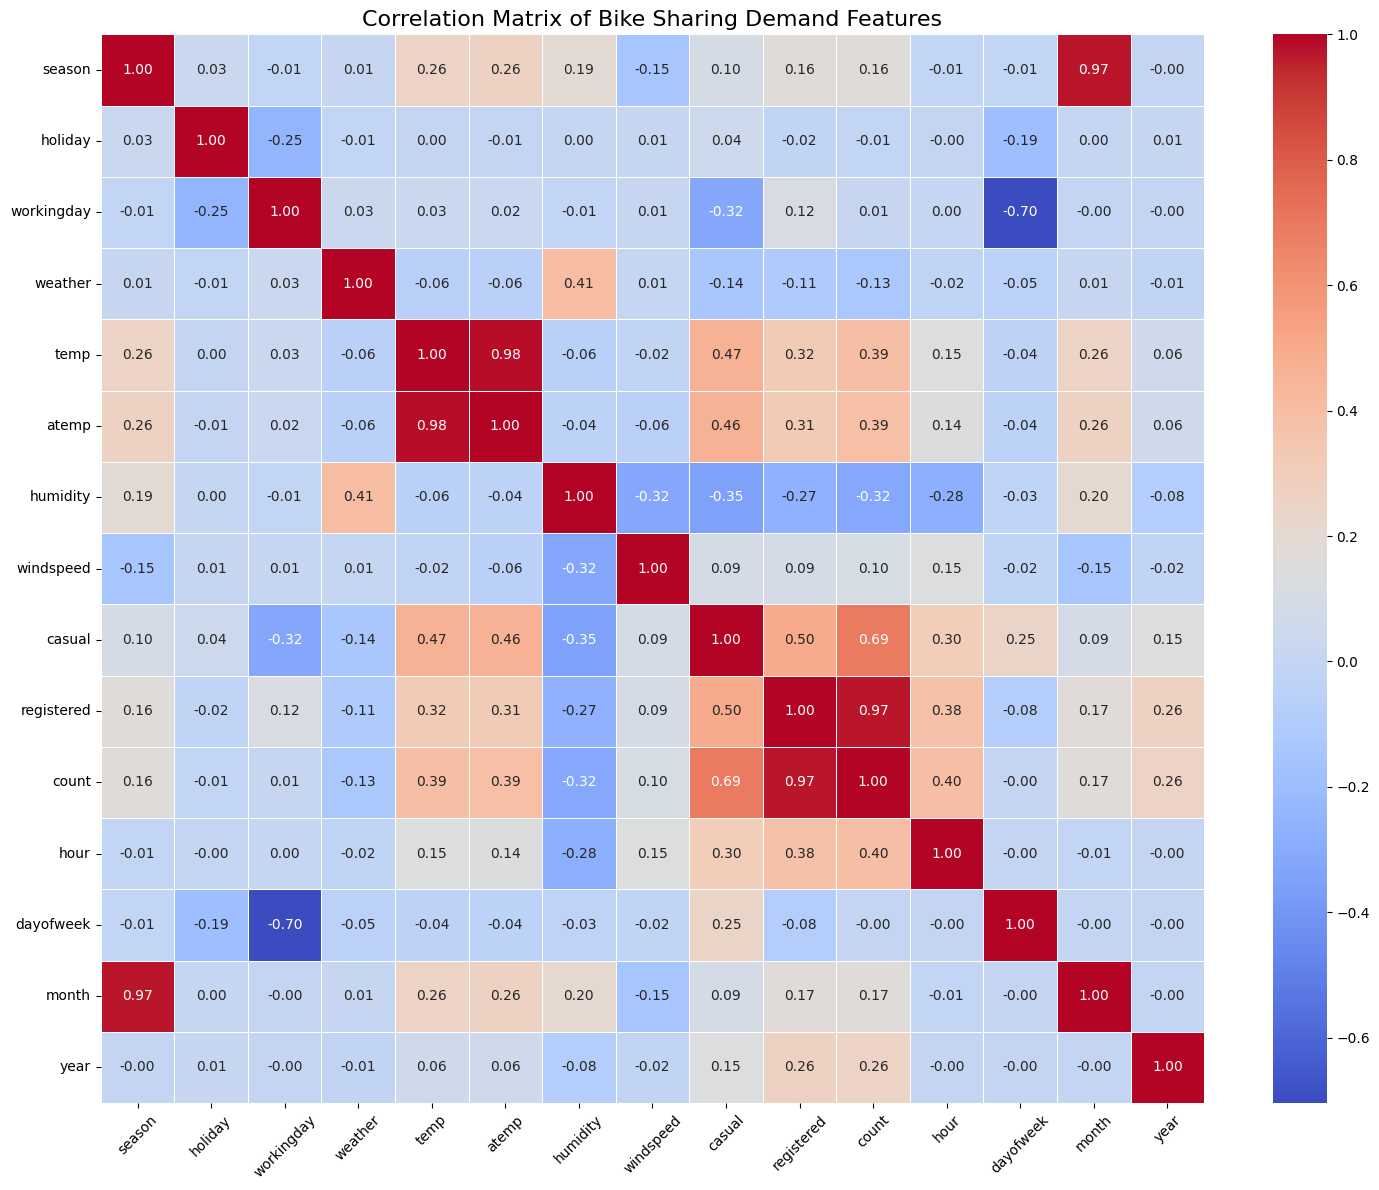

In [10]:
# 4. Calculate the Correlation Matrix
# We select only the numerical columns for this calculation.
correlation_matrix = bike_data.corr(numeric_only=True)

# 5. Generate and Save the Heatmap
# Set the size of the plot for better readability
plt.figure(figsize=(15, 12))

# Create the heatmap using seaborn
sns.heatmap(
    correlation_matrix,
    annot=True,          # Show the correlation values on the heatmap
    cmap='coolwarm',     # Use a color scheme that's easy to interpret
    fmt=".2f",           # Format the numbers to two decimal places
    linewidths=.5        # Add lines between the cells
)

# Add a title and adjust layout
plt.title('Correlation Matrix of Bike Sharing Demand Features', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping

# Save the plot to a file
plt.savefig('correlation_heatmap.png')

print("Heatmap saved successfully as 'correlation_heatmap.png'")

In [11]:
'''HIGH: casual - temp,atemp,hour,dayofweek
--------------------------------------------------------------------------
, LOW: month,year,season,holiday,windspeed
'''

'HIGH: casual - temp,atemp,hour,dayofweek\n--------------------------------------------------------------------------\n, LOW: month,year,season,holiday,windspeed\n'

In [12]:
'''HIGH: registered - temp,atemp,hour,year
---------------------------------------------------------------------------
, LOW: season,workingday,windspeed,month
'''

'HIGH: registered - temp,atemp,hour,year\n---------------------------------------------------------------------------\n, LOW: season,workingday,windspeed,month\n'

In [13]:
print("I have to predict each 'casual' & 'registered'--->'count'")

I have to predict each 'casual' & 'registered'--->'count'


In [14]:
# --- 3. One-Hot Encoding ---
print("Applying one-hot encoding...")
# Identify categorical columns to be encoded.
# These columns have a limited number of distinct, non-ordinal values.
categorical_features = ['season', 'weather', 'hour', 'dayofweek', 'month', 'year']

# Use pandas get_dummies to convert categorical variables into dummy/indicator variables
encoded_bike_data = pd.get_dummies(bike_data, columns=categorical_features)

Applying one-hot encoding...


In [15]:
print("\n--- Data after One-Hot Encoding ---")
print("Shape of the new encoded DataFrame:", encoded_bike_data.shape)
print("\nFirst 5 rows of the encoded data:")
print(encoded_bike_data.head())


--- Data after One-Hot Encoding ---
Shape of the new encoded DataFrame: (10886, 63)

First 5 rows of the encoded data:
             datetime  holiday  workingday  temp   atemp  humidity  windspeed  \
0 2011-01-01 00:00:00        0           0  9.84  14.395        81        0.0   
1 2011-01-01 01:00:00        0           0  9.02  13.635        80        0.0   
2 2011-01-01 02:00:00        0           0  9.02  13.635        80        0.0   
3 2011-01-01 03:00:00        0           0  9.84  14.395        75        0.0   
4 2011-01-01 04:00:00        0           0  9.84  14.395        75        0.0   

   casual  registered  count  ...  month_5  month_6  month_7  month_8  \
0       3          13     16  ...    False    False    False    False   
1       8          32     40  ...    False    False    False    False   
2       5          27     32  ...    False    False    False    False   
3       3          10     13  ...    False    False    False    False   
4       0           1      1

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import joblib # For saving the model

## FEATURE: casual

In [17]:
categorical_features = ['season', 'weather', 'hour', 'dayofweek', 'month', 'year']
encoded_data = pd.get_dummies(bike_data, columns=categorical_features)

# --- 2. Define Features (X) and Target (y) ---
# The target variable is 'casual'
y_casual = encoded_data['casual']

# The features are all columns except the target variables and original datetime
# 'count' is the sum of 'casual' and 'registered', so it's removed to avoid data leakage.
X = encoded_data.drop(columns=['datetime', 'casual', 'registered', 'count'])

# --- 3. Split Data into Training and Testing Sets ---
print("Splitting data...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y_casual, test_size=0.2, random_state=42
)

# --- 4. Model Selection and Training ---
print("Training RandomForestRegressor for 'casual' rentals...")
# RandomForestRegressor is a good choice for its robustness and performance on tabular data.
casual_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model
casual_model.fit(X_train, y_train)

# --- 5. Save the Model ---
# It's good practice to save the trained model, test data, and feature list for later evaluation.
print("Saving model and test data...")
joblib.dump(casual_model, 'casual_model.pkl')
X_test.to_csv('X_test_casual.csv', index=False)
y_test.to_csv('y_test_casual.csv', index=False)

print("\n'casual' model training complete and artifacts saved.")



from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter space for the RandomForest
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [None] + list(range(10, 31, 5)),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'max_features': ['sqrt', 'log2', 1.0] # Changed from 'auto' to 1.0 for modern sklearn
}

Splitting data...
Training RandomForestRegressor for 'casual' rentals...
Saving model and test data...

'casual' model training complete and artifacts saved.


## FEATURE: registered

In [18]:
categorical_features = ['season', 'weather', 'hour', 'dayofweek', 'month', 'year']
encoded_data = pd.get_dummies(bike_data, columns=categorical_features)

# --- 2. Define Features (X) and Target (y) ---
# The target variable is 'registered'
y_registered = encoded_data['registered']

# Features are the same as for the casual model
X = encoded_data.drop(columns=['datetime', 'casual', 'registered', 'count'])

# --- 3. Split Data into Training and Testing Sets ---
print("Splitting data...")
# Using the same random_state ensures the split is consistent with the casual model
X_train, X_test, y_train, y_test = train_test_split(
    X, y_registered, test_size=0.2, random_state=42
)

# --- 4. Model Selection and Training ---
print("Training RandomForestRegressor for 'registered' rentals...")
registered_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model
registered_model.fit(X_train, y_train)

# --- 5. Save the Model ---
print("Saving model and test data...")
joblib.dump(registered_model, 'registered_model.pkl')
X_test.to_csv('X_test_registered.csv', index=False)
y_test.to_csv('y_test_registered.csv', index=False)

print("\n'registered' model training complete and artifacts saved.")

Splitting data...
Training RandomForestRegressor for 'registered' rentals...
Saving model and test data...

'registered' model training complete and artifacts saved.


## Evaluation for casual

Loading saved 'casual' model and test data...
Making predictions on the test set...
Calculating evaluation metrics...

--- Evaluation Metrics for Casual Model ---
Root Mean Squared Error (RMSE): 20.8842
R-squared (R²): 0.8281

Generating visualization...


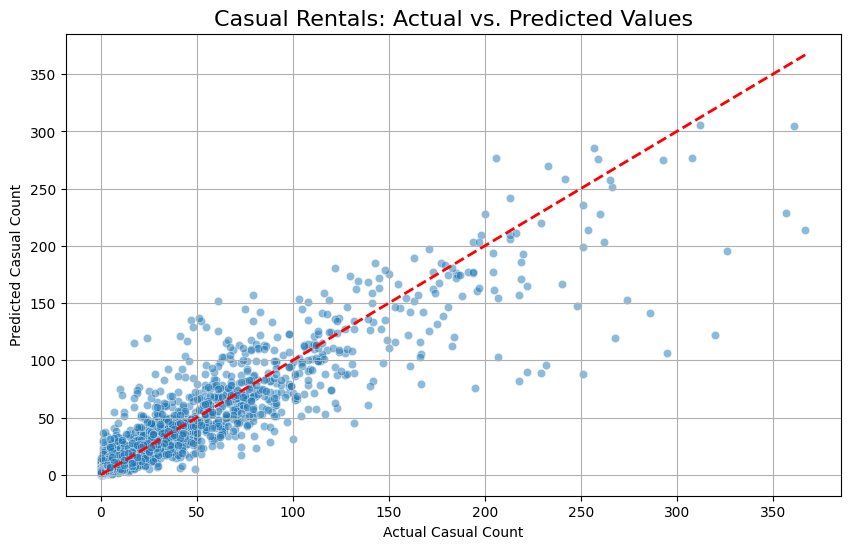

Evaluation plot saved as 'evaluation_casual.png'.


In [35]:
# evaluation_casual.py

import pandas as pd
import joblib
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load the Saved Model and Test Data ---
print("Loading saved 'casual' model and test data...")
casual_model = joblib.load('casual_model.pkl')
X_test = pd.read_csv('X_test_casual.csv')
y_test = pd.read_csv('y_test_casual.csv').squeeze() # Use squeeze to convert to a Series

# --- 2. Make Predictions ---
print("Making predictions on the test set...")
y_pred = casual_model.predict(X_test)

# --- 3. Calculate Evaluation Metrics ---
print("Calculating evaluation metrics...")
# Root Mean Squared Error (RMSE) gives an idea of the error magnitude in the same units as the target.
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# R-squared (R²) indicates the proportion of variance in the target that is predictable from the features.
r2 = r2_score(y_test, y_pred)

print(f"\n--- Evaluation Metrics for Casual Model ---")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# --- 4. Visualize Predictions vs. Actual Values ---
print("\nGenerating visualization...")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2) # Perfect prediction line
plt.title('Casual Rentals: Actual vs. Predicted Values', fontsize=16)
plt.xlabel('Actual Casual Count')
plt.ylabel('Predicted Casual Count')
plt.grid(True)
plt.savefig('evaluation_casual.png')
plt.show()

print("Evaluation plot saved as 'evaluation_casual.png'.")

## Evaluation for registered

Loading saved 'registered' model and test data...
Making predictions on the test set...
Calculating evaluation metrics...

--- Evaluation Metrics for Registered Model ---
Root Mean Squared Error (RMSE): 36.6632
R-squared (R²): 0.9408

Generating visualization...


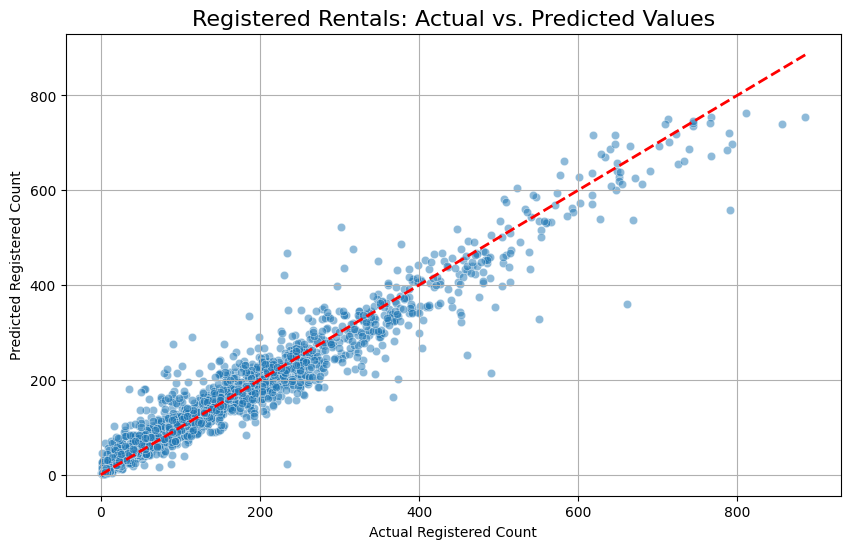

Evaluation plot saved as 'evaluation_registered.png'.


In [36]:
# evaluation_registered.py

import pandas as pd
import joblib
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load the Saved Model and Test Data ---
print("Loading saved 'registered' model and test data...")
registered_model = joblib.load('registered_model.pkl')
X_test = pd.read_csv('X_test_registered.csv')
y_test = pd.read_csv('y_test_registered.csv').squeeze() # Use squeeze to convert to a Series

# --- 2. Make Predictions ---
print("Making predictions on the test set...")
y_pred = registered_model.predict(X_test)

# --- 3. Calculate Evaluation Metrics ---
print("Calculating evaluation metrics...")
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\n--- Evaluation Metrics for Registered Model ---")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# --- 4. Visualize Predictions vs. Actual Values ---
print("\nGenerating visualization...")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2) # Perfect prediction line
plt.title('Registered Rentals: Actual vs. Predicted Values', fontsize=16)
plt.xlabel('Actual Registered Count')
plt.ylabel('Predicted Registered Count')
plt.grid(True)
plt.savefig('evaluation_registered.png')
plt.show()

print("Evaluation plot saved as 'evaluation_registered.png'.")

Loading pre-trained models and test data...
Loading original data to get the true 'count' values...
Making predictions for 'casual' and 'registered'...
Combining predictions to get total 'count'...
Calculating final evaluation metrics for 'count'...

--- Final Evaluation Metrics for Total Count ---
Root Mean Squared Error (RMSE): 46.1435
R-squared (R²): 0.9355

Generating final evaluation plot...


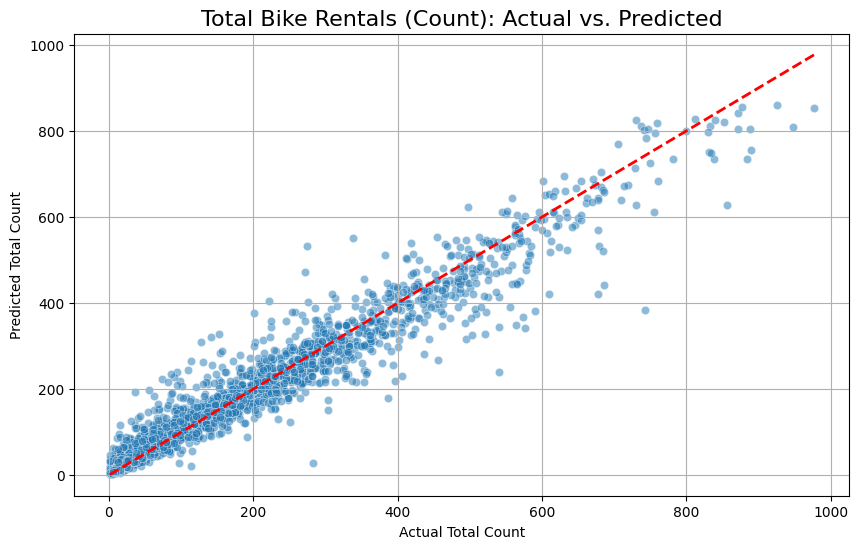

Final evaluation plot saved as 'evaluation_total_count.png'.


In [37]:
# final_evaluation.py

import pandas as pd
import joblib
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load Pre-trained Models and Test Features ---
print("Loading pre-trained models and test data...")
# Load the models saved from the previous steps
casual_model = joblib.load('casual_model.pkl')
registered_model = joblib.load('registered_model.pkl')

# We only need one of the X_test files as they are identical
X_test = pd.read_csv('X_test_casual.csv')

# --- 2. Load Original Data to Get True 'count' for the Test Set ---
# We need to recreate the exact same train-test split on the original data
# to get the correct 'count' values that correspond to our X_test set.
print("Loading original data to get the true 'count' values...")
bike_data = pd.read_csv("train.csv")

# We don't need to re-do all the feature engineering, just the train-test split
# on the target variable 'count' to get our y_test.
_, y_test_count = train_test_split(
    bike_data['count'], test_size=0.2, random_state=42
)


# --- 3. Make Predictions for Casual and Registered ---
print("Making predictions for 'casual' and 'registered'...")
y_pred_casual = casual_model.predict(X_test)
y_pred_registered = registered_model.predict(X_test)

# --- 4. Combine Predictions to Get Total Count ---
# The total count is the sum of casual and registered predictions.
print("Combining predictions to get total 'count'...")
y_pred_count = y_pred_casual + y_pred_registered

# It's good practice to ensure predictions are non-negative, as a negative count is impossible.
y_pred_count[y_pred_count < 0] = 0


# --- 5. Evaluate the Combined 'count' Prediction ---
print("Calculating final evaluation metrics for 'count'...")
# Root Mean Squared Error (RMSE)
rmse_count = np.sqrt(mean_squared_error(y_test_count, y_pred_count))

# R-squared (R²)
r2_count = r2_score(y_test_count, y_pred_count)

print(f"\n--- Final Evaluation Metrics for Total Count ---")
print(f"Root Mean Squared Error (RMSE): {rmse_count:.4f}")
print(f"R-squared (R²): {r2_count:.4f}")

# --- 6. Visualize Final Predictions vs. Actuals ---
print("\nGenerating final evaluation plot...")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_count, y=y_pred_count, alpha=0.5)
plt.plot([y_test_count.min(), y_test_count.max()], [y_test_count.min(), y_test_count.max()], '--r', linewidth=2)
plt.title('Total Bike Rentals (Count): Actual vs. Predicted', fontsize=16)
plt.xlabel('Actual Total Count')
plt.ylabel('Predicted Total Count')
plt.grid(True)
plt.savefig('evaluation_total_count.png')
plt.show()

print("Final evaluation plot saved as 'evaluation_total_count.png'.")

In [38]:
def generate_submission(test_file_path, casual_model_path, registered_model_path, training_cols_path, output_path):
    """
    Loads test data, preprocesses it, makes predictions using trained models,
    and generates a submission file.

    Args:
        test_file_path (str): Path to the test.csv file.
        casual_model_path (str): Path to the trained casual model (.pkl).
        registered_model_path (str): Path to the trained registered model (.pkl).
        training_cols_path (str): Path to a CSV file containing the test feature columns
                                  from the training split (e.g., 'X_test_casual.csv').
        output_path (str): Path to save the final submission file.
    """
    # --- 1. Load Models and Data ---
    print("Loading models and test data...")
    try:
        casual_model = joblib.load(casual_model_path)
        registered_model = joblib.load(registered_model_path)
        test_data = pd.read_csv(test_file_path)
        training_columns = pd.read_csv(training_cols_path).columns.tolist()
    except FileNotFoundError as e:
        print(f"Error loading file: {e}. Please ensure all necessary files are present.")
        return

    original_datetime = test_data['datetime']

    # --- 2. Preprocess Test Data ---
    print("Preprocessing test data...")
    # a. Feature Engineering from Datetime
    test_data['datetime'] = pd.to_datetime(test_data['datetime'])
    test_data['hour'] = test_data['datetime'].dt.hour
    test_data['dayofweek'] = test_data['datetime'].dt.dayofweek
    test_data['month'] = test_data['datetime'].dt.month
    test_data['year'] = test_data['datetime'].dt.year

    # b. One-Hot Encoding
    categorical_features = ['season', 'weather', 'hour', 'dayofweek', 'month', 'year']
    test_encoded = pd.get_dummies(test_data, columns=categorical_features)

    # --- 3. Align Columns ---
    print("Aligning data columns...")
    missing_cols = set(training_columns) - set(test_encoded.columns)
    for c in missing_cols:
        test_encoded[c] = 0
    X_test_final = test_encoded[training_columns]

    # --- 4. Make Predictions ---
    print("Generating predictions...")
    pred_casual = casual_model.predict(X_test_final)
    pred_registered = registered_model.predict(X_test_final)

    # Combine, clip at 0, and convert to integer
    pred_count = np.round(pred_casual + pred_registered)
    pred_count[pred_count < 0] = 0
    pred_count = pred_count.astype(int)

    # --- 5. Generate Submission File ---
    print("Creating submission file...")
    submission = pd.DataFrame({
        'datetime': original_datetime,
        'count': pred_count
    })

    submission.to_csv(output_path, index=False)
    print(f"\nSubmission file '{output_path}' created successfully.")
    print("\nFirst 5 rows:")
    print(submission.head())


if __name__ == '__main__':
    # Define the paths to your files
    TEST_DATA = 'test.csv'
    CASUAL_MODEL = 'casual_model.pkl'
    REGISTERED_MODEL = 'registered_model.pkl'
    TRAINING_COLUMNS_FILE = 'X_test_casual.csv' # Used to get the feature list
    OUTPUT_FILE = 'submission.csv'

    # Run the prediction and file generation process
    generate_submission(
        test_file_path=TEST_DATA,
        casual_model_path=CASUAL_MODEL,
        registered_model_path=REGISTERED_MODEL,
        training_cols_path=TRAINING_COLUMNS_FILE,
        output_path=OUTPUT_FILE
    )

Loading models and test data...
Preprocessing test data...
Aligning data columns...
Generating predictions...
Creating submission file...

Submission file 'submission.csv' created successfully.

First 5 rows:
              datetime  count
0  2011-01-20 00:00:00     12
1  2011-01-20 01:00:00      8
2  2011-01-20 02:00:00      6
3  2011-01-20 03:00:00      5
4  2011-01-20 04:00:00      4
